In [123]:
import pandas as pd

In [124]:
test_case = pd.read_csv("test.csv")
train_case = pd.read_csv("train.csv")
dataset = train_case
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [125]:
dataset.corr()
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [126]:
feature_columns = dataset.drop(columns=['price_range'])
target_column = dataset['price_range']

In [127]:
from sklearn.model_selection import train_test_split
X = feature_columns
y = target_column
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf = clf.fit(X_train, y_train)

In [130]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 3, 0, 3, 1, 3, 2, 0, 2, 0, 1, 3, 3, 0, 3, 3, 2, 1, 2, 3, 3,
       2, 3, 2, 1, 0, 2, 2, 1, 2, 0, 1, 3, 3, 1, 0, 0, 2, 2, 1, 3, 1, 0,
       1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 1, 2, 0, 0,
       0, 0, 2, 0, 3, 0, 1, 1, 0, 0, 0, 0, 3, 2, 1, 3, 1, 0, 0, 3, 3, 1,
       3, 2, 0, 0, 2, 3, 3, 0, 2, 0, 3, 1, 0, 3, 3, 2, 3, 2, 0, 1, 2, 2,
       0, 1, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 2, 1, 3, 1, 3, 3, 3, 2, 3, 0,
       2, 1, 1, 2, 3, 1, 3, 3, 0, 0, 2, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 3,
       3, 3, 3, 1, 0, 2, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 1, 1, 2, 0, 1, 2,
       2, 1, 0, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 3, 3, 2, 1, 3, 0, 0, 1,
       2, 3, 1, 2, 2, 2, 2, 3, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 3, 3, 2, 3, 0, 1, 0,
       3, 1, 3, 0, 3, 3, 0, 3, 2, 3, 3, 2, 3, 0, 3, 1, 2, 2, 1, 0, 0, 0,
       3, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 1, 2, 0, 1, 3, 1,
       3, 0, 3, 3, 3, 2, 1, 3, 2, 0, 3, 3, 0, 0, 3,

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.853030303030303

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[145,  16],
       [ 17, 134]], dtype=int64)

In [133]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='weighted')

0.8535058994584553

In [134]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='weighted')

0.853030303030303

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['accuracy_score', 'confusion_matrix', 'precision_score', 'recall_score']))

                  precision    recall  f1-score   support

  accuracy_score       0.90      0.90      0.90       161
confusion_matrix       0.79      0.79      0.79       170
 precision_score       0.79      0.81      0.80       155
    recall_score       0.93      0.91      0.92       174

        accuracy                           0.85       660
       macro avg       0.85      0.85      0.85       660
    weighted avg       0.85      0.85      0.85       660



In [136]:
feature_names = X.columns
feature_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [137]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance

,Importance
battery_power,0.115907
blue,0.002765
clock_speed,0.003466
dual_sim,0.000000
fc,0.002239
four_g,0.000000
int_memory,0.017373
m_dep,0.007602
mobile_wt,0.014568
n_cores,0.002408


In [138]:
feature_importance = feature_importance.sort_values('Importance', ascending=False)

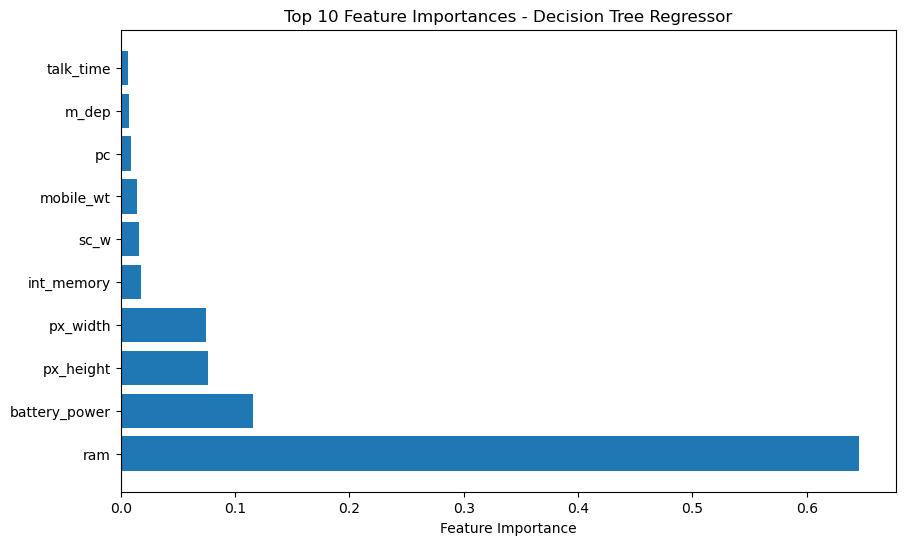

In [139]:
from matplotlib import pyplot as plt
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance.index[:top_n])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree Regressor')
plt.show()

[Text(0.5046088129496403, 0.9583333333333334, 'x[13] <= 0.12\nentropy = 2.0\nsamples = 1340\nvalue = [339, 330, 345, 326]'),
 Text(0.1818794964028777, 0.875, 'x[13] <= -0.849\nentropy = 1.364\nsamples = 707\nvalue = [339, 298, 70, 0]'),
 Text(0.07733812949640288, 0.7916666666666666, 'x[11] <= 1.388\nentropy = 0.579\nsamples = 333\nvalue = [287, 46, 0, 0]'),
 Text(0.0539568345323741, 0.7083333333333334, 'x[0] <= 0.093\nentropy = 0.417\nsamples = 297\nvalue = [272, 25, 0, 0]'),
 Text(0.046762589928057555, 0.625, 'entropy = 0.0\nsamples = 169\nvalue = [169, 0, 0, 0]'),
 Text(0.06115107913669065, 0.625, 'x[13] <= -1.198\nentropy = 0.712\nsamples = 128\nvalue = [103, 25, 0, 0]'),
 Text(0.03597122302158273, 0.5416666666666666, 'x[12] <= 0.977\nentropy = 0.362\nsamples = 87\nvalue = [81, 6, 0, 0]'),
 Text(0.02158273381294964, 0.4583333333333333, 'x[9] <= -1.324\nentropy = 0.098\nsamples = 79\nvalue = [78, 1, 0, 0]'),
 Text(0.014388489208633094, 0.375, 'x[11] <= 0.092\nentropy = 0.503\nsamples

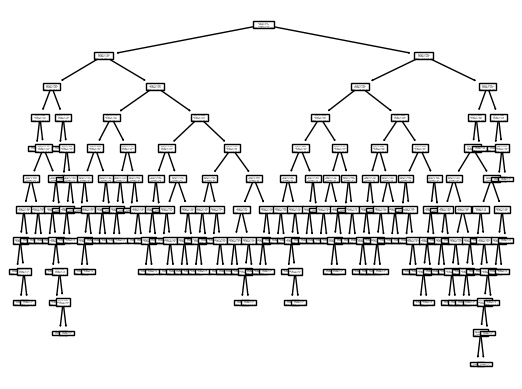

In [140]:
from sklearn import tree
tree.plot_tree(clf)